In [10]:
#Imports
from tabulate import tabulate
import pandas as pd
import webbrowser
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import Image, display
import pydotplus
from scipy import misc
import geopandas as gpd
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup
import os
import time
import openpyxl
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import re

In [ ]:
#Main
year =2022
amount_of_data_frames = 1
dframes =[]
driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")

#DOMAIN'S
main_players_stat_domain = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"        #0
totalpoints_player_domain = "https://www.basketball-reference.com/leagues/NBA_2022_totals.html"         #1
player_plusminus_domain = "https://www.basketball-reference.com/leagues/NBA_2022_advanced.html"         #2
team_victories_domain = "https://www.basketball-reference.com/leagues/NBA_2022.html"                    #3
full_player_points_domain = "https://www.espn.com/nba/standings/_/season/2022/group/league"             #4 *** Different Button Class - might consider selenium ***
check_if_player_is_allstar_domain = "https://www.basketball-reference.com/allstar/NBA_2022.html"        #5 *** Different Button Class ***
won_conference_team_domain = "https://blog.ticketcity.com/nba/nba-finals-champions/"                    #6
player_salary_domain = "https://hoopshype.com/salaries/players/2021-2022/"                              #7
mvp_predict_domain = "https://www.basketball-reference.com/awards/awards_2022.html"                               #8
domains = [main_players_stat_domain,totalpoints_player_domain,player_plusminus_domain,team_victories_domain,full_player_points_domain,check_if_player_is_allstar_domain,won_conference_team_domain,player_salary_domain, mvp_predict_domain ]
def create_dataframe(main_players_stat_domain,totalpoints_player_domain,player_plusminus_domain,team_victories_domain,full_player_points_domain,check_if_player_is_allstar_domain,won_conference_team_domain,player_salary_domain,mvp_predict_domain):
    #Main Player-Statistics pull
    main_players_stats_request = requests.get(main_players_stat_domain)
    main_players_stats_soup = BeautifulSoup(main_players_stats_request.content,'html.parser')
    #Categories
    playername = []
    position = []
    age = []
    team = []
    salary = []
    won_conference = []
    victories_in_season = []
    allpoints = []
    ppg = []
    team_conference_rank = []
    is_allstar = []
    plusminus = []
    orpg = []
    drpg = []
    apg = []
    games_played = []
    minutes_per_game = []
    blocks = []
    steals = []
    point3_perc = []
    point2_perc = []
    east_rank = []
    west_rank = []
    total_mvp = []
    year = [] #24
    mvp_prospect = []#25
    maxDataSetSize = 812
    categories = [playername,position,age,team,salary,won_conference,victories_in_season,allpoints,ppg,team_conference_rank,is_allstar,plusminus,orpg,drpg,apg,games_played,minutes_per_game,blocks,steals, point3_perc, point2_perc,east_rank, west_rank, total_mvp, year, mvp_prospect]
    def getDataStat(tag,category,arr):
        tempTag = main_players_stats_soup.findAll(tag,{"data-stat":category})
        if not tempTag:
            for i in range(maxDataSetSize):
                arr.append(None)
        else:
            for i in tempTag:
                arr.append(i.text.strip())

    for cat in categories:
        if categories.index(cat) == 0:
            data_stat_tag = 'player'
        elif categories.index(cat) == 1:
            data_stat_tag = 'pos'
        elif categories.index(cat) == 2:
            data_stat_tag = 'age'
        elif categories.index(cat) == 3:
            data_stat_tag = 'team_id'
        elif categories.index(cat) == 4:
            data_stat_tag = 'team'
        elif categories.index(cat) == 8:
            data_stat_tag = 'pts_per_g'
        elif categories.index(cat) == 12:
            data_stat_tag = 'orb_per_g'
        elif categories.index(cat) == 13:
            data_stat_tag = 'drb_per_g'
        elif categories.index(cat) == 14:
            data_stat_tag = 'ast_per_g'
        elif categories.index(cat) == 15:
            data_stat_tag = 'g'
        elif categories.index(cat) == 16:
            data_stat_tag = 'mp_per_g'
        elif categories.index(cat) == 17:
            data_stat_tag = 'blk_per_g'
        elif categories.index(cat) == 18:
            data_stat_tag = 'stl_per_g'
        elif categories.index(cat) == 19:
            data_stat_tag = 'fg3_pct'
        elif categories.index(cat) == 20:
            data_stat_tag = 'fg2_pct'
        else:
            data_stat_tag = None
        getDataStat("td", data_stat_tag, cat)

    #insert selected year to array
    selectedYear = (main_players_stats_soup.find("div",{"id":"meta"})).find('span').text
    currentYear = int(selectedYear[:4])+1
    for i in range(maxDataSetSize):
        year[i] = selectedYear

    #Takes the full points of a player in a team
    totalpoints_player_request = requests.get(totalpoints_player_domain)
    totalpoints_player_soup = BeautifulSoup(totalpoints_player_request.content,'html.parser')
    tempTag = totalpoints_player_soup.findAll("td", {"data-stat": "pts"})
    k =0
    for i in tempTag:
        allpoints[k] = (i.text.strip())
        k = k+1
    #takes the plusminus of a player in a team
    player_plusminus_request = requests.get(player_plusminus_domain)
    player_plusminus_soup = BeautifulSoup(player_plusminus_request.content,'html.parser')
    tempTag = player_plusminus_soup.findAll("td", {"data-stat": "bpm"})
    k = 0
    for i in tempTag:
        plusminus[k] = (i.text.strip())
        k = k+1

    value_by_team_dict = {
        "ATL": 0,
        "BOS": 0,
        "BRK": 0,
        "CHO": 0,
        "CHI": 0,
        "CLE": 0,
        "DAL": 0,
        "DEN": 0,
        "DET": 0,
        "GSW": 0,
        "HOU": 0,
        "IND": 0,
        "LAC": 0,
        "LAL": 0,
        "MEM": 0,
        "MIA": 0,
        "MIL": 0,
        "MIN": 0,
        "NOP": 0,
        "NYK": 0,
        "OKC": 0,
        "ORL": 0,
        "PHI": 0,
        "PHO": 0,
        "POR": 0,
        "SAC": 0,
        "SAS": 0,
        "TOR": 0,
        "UTA": 0,
        "WAS": 0
    }

    def get_team_abbreviation(team_name):
        team_abbreviations = {
            "Atlanta Hawks": "ATL",
            "Boston Celtics": "BOS",
            "Brooklyn Nets": "BRK",
            "Charlotte Hornets": "CHO",
            "Chicago Bulls": "CHI",
            "Cleveland Cavaliers": "CLE",
            "Dallas Mavericks": "DAL",
            "Denver Nuggets": "DEN",
            "Detroit Pistons": "DET",
            "Golden State Warriors": "GSW",
            "Houston Rockets": "HOU",
            "Indiana Pacers": "IND",
            "Los Angeles Clippers": "LAC",
            "Los Angeles Lakers": "LAL",
            "Memphis Grizzlies": "MEM",
            "Miami Heat": "MIA",
            "Milwaukee Bucks": "MIL",
            "Minnesota Timberwolves": "MIN",
            "New Orleans Pelicans": "NOP",
            "New York Knicks": "NYK",
            "Oklahoma City Thunder": "OKC",
            "Orlando Magic": "ORL",
            "Philadelphia 76ers": "PHI",
            "Phoenix Suns": "PHO",
            "Portland Trail Blazers": "POR",
            "Sacramento Kings": "SAC",
            "San Antonio Spurs": "SAS",
            "Toronto Raptors": "TOR",
            "Utah Jazz": "UTA",
            "Washington Wizards": "WAS",
            #extraordinary abbr
            "LA Clippers":  "LAC"

        }
        return team_abbreviations.get(team_name, "None")

    def updateTeamVictoriesDict():
        team_victories_request = requests.get(team_victories_domain)
        team_victories_soup = BeautifulSoup(team_victories_request.content, 'html.parser')
        team_stats = team_victories_soup.findAll("tr", {"class": "full_table"})
        for t in team_stats:
            name = (t.find("th",{"data-stat":'team_name'})).find('a').text
            win = (t.find("td",{"data-stat":'wins'})).text
            # print(get_team_abbreviation(name))
            # print(win)
            value_by_team_dict[get_team_abbreviation(name)] = win

    updateTeamVictoriesDict()

    def updateDfWinByTeam():
        df.loc[df['Team'].isin(value_by_team_dict.keys()), 'Victories in Season'] = df['Team'].map(value_by_team_dict)


    #pads with NaNs to make sure that all arrays (that makes the dataframes) are thew same length
    for cat in categories:
        if len(cat)<=maxDataSetSize:
            for i in range (maxDataSetSize-len(cat)):
                cat.append(None)


    #Creates the DataFrame

    df = pd.DataFrame({'Player': playername,
                         'Position': position,
                         'Age': age,
                         'Salary': salary,
                         'Team': team,
                         'Won Conference': won_conference,
                         'Victories in Season': victories_in_season,
                         'All Points': allpoints,
                         'Points Per Game (PPG)': ppg,
                         'Team Conference Rank': team_conference_rank,
                         'Is All-Star': is_allstar,
                         'Plus/Minus': plusminus,
                         'Offensive Rebounds Per Game (ORPG)': orpg,
                         'Defensive Rebounds Per Game (DRPG)': drpg,
                         'Assists Per Game (APG)': apg,
                         'Games Played': games_played,
                         'Minutes Per Game': minutes_per_game,
                         'Blocks': blocks,
                         'Steals': steals,
                         '%3': point3_perc,
                         '%2': point2_perc,
                         'year': year,
                         'MVP Prospect': mvp_prospect
                        })

    updateDfWinByTeam()

    #Takes the full points of a player in a team
    full_player_points_request = requests.get(full_player_points_domain)
    full_player_points_soup = BeautifulSoup(full_player_points_request.content,'html.parser')
    tempTag = full_player_points_soup.findAll("span", {"class": "dn show-mobile"})
    rank = 1
    for i in tempTag:
        t=i.find('abbr')
        name = (t['title'])
        value_by_team_dict[get_team_abbreviation(name)] = rank
        rank = rank +1
    df.loc[df['Team'].isin(value_by_team_dict.keys()), 'Team Conference Rank'] = df['Team'].map(value_by_team_dict)



    #getAllstar column
    check_if_player_is_allstar_request = requests.get(check_if_player_is_allstar_domain)
    check_if_player_is_allstar_soup = BeautifulSoup(check_if_player_is_allstar_request.content,'html.parser')
    thTags = check_if_player_is_allstar_soup.findAll("th", {"data-stat": "player","csk":True})
    for th in thTags:
        name = th.find('a').text
        df.loc[df['Player'] == name, 'Is All-Star'] = 1


    #getWonConference column

    won_conference_team_request = requests.get("https://www.landofbasketball.com/championships/year_by_year.htm")
    won_conference_team_soup = BeautifulSoup(won_conference_team_request.content, "html.parser")
    wonConference = won_conference_team_soup.findAll("div", {"class": "rd-100 a-center a-right-sm margen-r5 wpx-170"})
    lostConference = won_conference_team_soup.findAll("div", {"class": "rd-100 a-center a-left-sm wpx-170"})
    w = []
    l = []
    for i in wonConference:
        winningTeam = i.find('a').text
        w.append(winningTeam)
    for i in lostConference:
        losingTeam = i.find('a').text
        l.append(losingTeam)

    df.loc[df['Team'] == get_team_abbreviation(w[2022-currentYear]), 'Won Conference'] = 1
    df.loc[df['Team'] == get_team_abbreviation(l[2022-currentYear]), 'Won Conference'] = 1


    #Get the Salary column assigning each player his years salary by his name
    player_salary_request = requests.get(player_salary_domain)
    player_salary_soup= BeautifulSoup(player_salary_request.content,"html.parser")
    playerSalaryWrapper = player_salary_soup.find("div", {"class": "table-wrapper"})
    salaries = {}
    tableNameTag = player_salary_soup.find("table", {"class": True})
    salByNameTag = tableNameTag.findAll("tr")
    for s in salByNameTag:
        aTag = s.find('a')
        if (aTag is not None): player_name = aTag.text.strip()
        sals = s.findAll("td")
        if(len(sals)>=3):
            s = sals[3].text.strip()
        if ('$' in s):
            salary = s
            salaries[player_name] = salary

    # Iterate over the rows in the data frame
    for index, row in df.iterrows():
        player_name = row["Player"]
        # Check if the player is in the salaries dictionary and replace the value , otherwise replace it with NaN
        if player_name in salaries: df.at[index, "Salary"] = salaries[player_name]
        else:   df.at[index, "Salary"] = "N/A"
    salaries = None

    #get MVP Prospect bool
    if mvp_predict_domain is not None:
        mvp_prospect_request = requests.get(mvp_predict_domain)
        mvp_prospect_soup = BeautifulSoup(mvp_prospect_request.content, "html.parser")
        playertBody = mvp_prospect_soup.find('tbody')
        player_td_tag = playertBody.findAll("td",{"data-stat":"player"})
        for p in player_td_tag:
            name = p.find("a").text
            df.loc[df['Player'] == name, 'MVP Prospect'] = 1
    return df


dframes.append(create_dataframe(domains[0],domains[1],domains[2],domains[3],domains[4],domains[5],domains[6],domains[7],domains[8]))
# #Selenium
for dfs in range(amount_of_data_frames):
    i=0
    for i in range(4):
        driver.get(domains[i])
        link = driver.find_element_by_css_selector('a.button2.prev').get_attribute('href')
        domains[i] = link
    i=i+1
    #fourth site
    year = year -(dfs+1)
    link = "https://www.espn.com/nba/standings/_/season/"+str(year)+"/group/league"
    domains[i] = link
    i=i+1
    #fifth site
    driver.get(domains[i])
    link = driver.find_element_by_css_selector('a.button2').get_attribute('href')
    domains[i] = link
    i=i+2
    if dfs == 1:
        domains[7] = "https://hoopshype.com/salaries/players/2020-2021/"
        domains[8] = "https://www.basketball-reference.com/awards/awards_2021.html"
    #sixth site - Not needed - its a list for all years back conference winners and losers
    #Seventh site - extracting the previous link for the players salaries

    dframes.append(create_dataframe(domains[0],domains[1],domains[2],domains[3],domains[4],domains[5],domains[6],domains[7],domains[8]))
    driver.quit()


domains[0] = "https://www.basketball-reference.com/leagues/NBA_2020_per_game.html"
domains[1] = "https://www.basketball-reference.com/leagues/NBA_2020_totals.html"
domains[2] = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html"
domains[3] = "https://www.basketball-reference.com/leagues/NBA_2020.html"
domains[4] = "https://www.espn.com/nba/standings/_/season/2020/group/league"
domains[5] = "https://www.basketball-reference.com/allstar/NBA_2020.html"
domains[7] = "https://hoopshype.com/salaries/players/2019-2020/"
domains[8] = "https://www.basketball-reference.com/awards/awards_2020.html"

dframes.append(create_dataframe(domains[0],domains[1],domains[2],domains[3],domains[4],domains[5],domains[6],domains[7],domains[8]))
i=0
print(domains[7])
for df in dframes:
    filename = ("DataFrame"+str(i))
    i=i+1
    df.to_csv(filename)
    print(tabulate(df, headers='keys'))
    print("****************************************************************************************************************************************************************************************************************")


In [2]:
#Cleaning Phase
df = pd.read_csv("DataFrame0")
df1 = pd.read_csv("DataFrame1")
df2 = pd.read_csv("DataFrame2")
dfs = [df,df1,df2]
beforeCleaning = pd.concat([df,df1,df2])
print(beforeCleaning.shape)
#Cleaning Phase
for df in dfs:
    del df['Unnamed: 0']
    df.dropna(subset=['Player'], how='all', inplace=True)
    df.dropna(subset=['Victories in Season'], how='all', inplace=True)
    df['Won Conference'].fillna(0, inplace=True)
    df['Is All-Star'].fillna(0, inplace=True)
    df['MVP Prospect'].fillna(0, inplace=True)
    # df['MVP Prospect'] = df['Points Per Game (PPG)'].apply(lambda x: 1 if x > 27 else 0)
    # df['MVP Prospect'] = df['Defensive Rebounds Per Game (DRPG)'].apply(lambda x: 1 if x >=7 else 0)
    # df['MVP Prospect'] = df['Blocks'].apply(lambda x: 1 if x >=0.6 else 0)
    df['MVP Prospect'] = df[['Points Per Game (PPG)', 'Defensive Rebounds Per Game (DRPG)', 'Blocks']].apply(lambda x: 1 if (x['Points Per Game (PPG)'] >= 27) | (x['Defensive Rebounds Per Game (DRPG)'] >= 6) | (x['Blocks'] >= 0.6) else 0, axis=1)
result = pd.concat([df,df1,df2])

result.dropna(how="any",inplace=True)
# select only the numeric columns
numeric_cols = result.select_dtypes(include=['float64','int64']).columns
result.to_csv("result")
print(result)

(2436, 24)
                       Player Position   Age       Salary Team  \
0                Steven Adams        C  26.0  $29,895,313  OKC   
1                 Bam Adebayo       PF  22.0   $3,995,744  MIA   
2           LaMarcus Aldridge        C  34.0  $30,077,284  SAS   
4    Nickeil Alexander-Walker       SG  21.0   $3,429,782  NOP   
5               Grayson Allen       SG  24.0   $2,810,375  MEM   
..                        ...      ...   ...          ...  ...   
644     Justin Wright-Foreman       PG  22.0      $92,045  UTA   
645            Thaddeus Young       PF  31.0  $14,922,960  CHI   
646                Trae Young       PG  21.0   $7,256,723  ATL   
647               Cody Zeller        C  27.0  $16,741,375  CHO   
650               Ivica Zubac        C  22.0   $7,497,899  LAC   

     Won Conference  Victories in Season  All Points  Points Per Game (PPG)  \
0               0.0                 44.0       684.0                   10.9   
1               1.0                 44

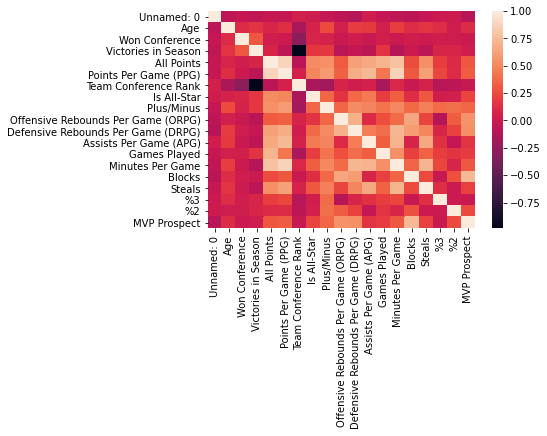

In [3]:
df = pd.read_csv("DataFrame0")
df1 = pd.read_csv("DataFrame1")
df2 = pd.read_csv("DataFrame2")
mvp_df = pd.read_csv("All Time MVP")
result = pd.read_csv("result")
dfs = [df,df1,df2]

# Convert the 'Player' column to a string
df['Player'] = df['Player'].astype(str)
df1['Player'] = df1['Player'].astype(str)
df2['Player'] = df2['Player'].astype(str)
avg_ppg = mvp_df['Points Per Game (PPG)'].mean()

#Heat Map
sns.heatmap(result._get_numeric_data().corr())
plt.show()

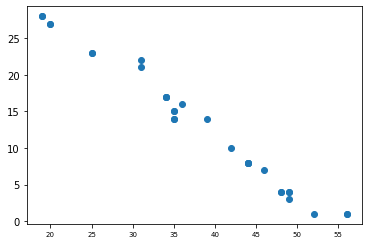

In [4]:
filtered_df = result[result['Points Per Game (PPG)'] > avg_ppg]
plt.scatter(filtered_df['Victories in Season'], filtered_df['Team Conference Rank'])
plt.tick_params(axis='x', labelsize=7)
plt.show()

(77, 14)


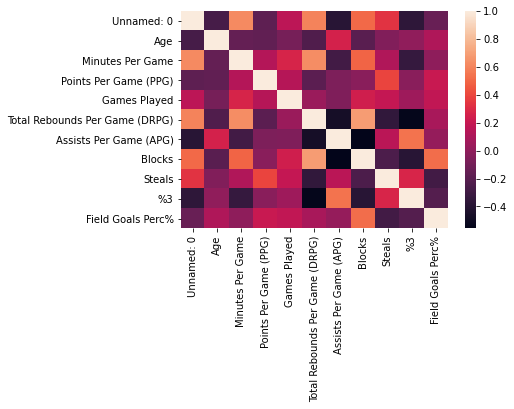

In [5]:
allmvp = pd.read_csv('All Time MVP')
print(allmvp.shape)
sns.heatmap(allmvp._get_numeric_data().corr())
plt.show()

In [6]:
#Vaw Effect 
webbrowser.open_new_tab('https://www.youtube.com/watch?v=dQw4w9WgXcQ&ab_channel=RickAstley')

True

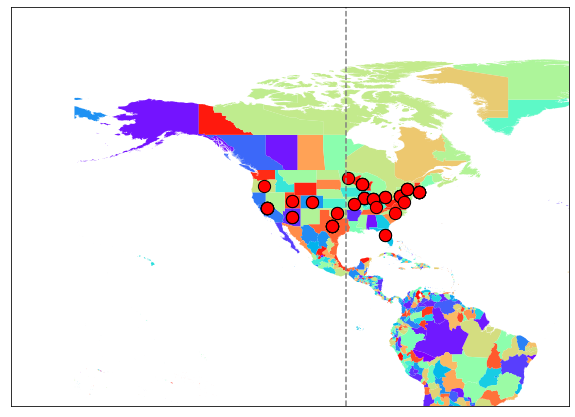

In [7]:

usamapstate = gpd.read_file('usamapstate.shp')
all_time_mvp = pd.read_csv('All Time MVP')
# Create a dictionary that maps team abbreviations to state names or abbreviations
team_to_state = {
    'DEN': 'Colorado',
    'MIL': 'Wisconsin',
    'HOU': 'Texas',
    'OKC': 'Oklahoma',
    'GSW': 'California',
    'MIA': 'Florida',
    'CHI': 'Illinois',
    'CLE': 'Ohio',
    'LAL': 'California',
    'DAL': 'Texas',
    'PHO': 'Arizona',
    'MIN': 'Minnesota',
    'SAS': 'Texas',
    'PHI': 'Pennsylvania',
    'UTA': 'Utah',
    'BOS': 'Massachusetts',
    'POR': 'Oregon',
    'BUF': 'New York',
    'NYK': 'New York',
    'BAL': 'Maryland',
    'CIN': 'Ohio',
    'PHW': 'Pennsylvania',
    'STL': 'Missouri',
    'NYA': 'New York',
    'INA': 'Indiana',
    'CAR': 'North Carolina',
    'KEN': 'Kentucky',
    'DNR': 'Indiana',
    'PTP': 'Indiana',
}
# Add a new column to the All Time MVP DataFrame with the state name or abbreviation
all_time_mvp['State'] = all_time_mvp['Team'].map(team_to_state)
# Merge the two DataFrames on the state name or abbreviation
mvp_with_geo = pd.merge(left=all_time_mvp, right=usamapstate, left_on='State', right_on='name')
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the US map
usamapstate.plot(ax=ax, column='name', cmap='rainbow', edgecolor='none')
# Add dots with red marks
for index, row in mvp_with_geo.iterrows():
    centroid = row.geometry.centroid
    ax.scatter(centroid.x, centroid.y, s=150, c='red', edgecolors='black', linewidth=1)
ax.axvline(x=-95, linestyle='--', color='gray')
ax.set_xlim([-200, -25])
ax.set_ylim([-25, 100])   
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [9]:
result = pd.read_csv("result")
del result['Unnamed: 0']
# split to train and test using only the numeric columns
X_train,X_test,y_train,y_test = train_test_split(result[['Victories in Season','Team Conference Rank','Minutes Per Game','Is All-Star']],result['MVP Prospect'],random_state=42,test_size=0.3)

clf = DecisionTreeClassifier(max_depth=4, min_samples_split=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Predicted labels:\n", y_pred)
print("\nActual labels:\n", y_test.values)
print("\nacc: " + str(acc)+"\n")

y_pred_padded = np.pad(y_pred, (0, result.shape[0]-y_pred.shape[0]), 'constant')
df_y_pred = pd.DataFrame({'Player': result['Player'], 'y_pred': y_pred_padded})
player_names = df_y_pred.loc[df_y_pred['y_pred'] == 1, 'Player']
print("Predicted Players:")
print(player_names)


Predicted labels:
 [0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0]

Actual labels:
 [1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0